In [1]:
import pandas as pd
import numpy as np
%precision %.4f

import warnings
warnings.filterwarnings('ignore')

# visualisation
import seaborn as sns
sns.set(style="whitegrid")
from matplotlib import pyplot as plt
%matplotlib inline
import missingno as msno

# sklearn
from sklearn.cluster import KMeans,DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

# pycaret
from pycaret.classification import *


In [2]:
df_netflix = pd.read_csv(r'D:\NCI Artificial Intelligence\Programming for AI - Abdul Razzaq\Final Project\Netflix\titles.csv')
df_amazon =  pd.read_csv(r'D:\NCI Artificial Intelligence\Programming for AI - Abdul Razzaq\Final Project\AmazonPrime\titles.csv')
df_disney =  pd.read_csv(r'D:\NCI Artificial Intelligence\Programming for AI - Abdul Razzaq\Final Project\DisneyPlus\titles.csv')

In [3]:
df_netflix['dataset_name'] = 'Netflix'
df_amazon['dataset_name'] = 'AmazonPrime'
df_disney['dataset_name'] = 'DisneyPlus'

In [4]:
df = pd.concat([df_netflix, df_amazon, df_disney], axis=0)

In [5]:
df.shape

(18864, 16)

In [6]:
df_movies = df.drop_duplicates(subset=[col for col in df.columns if col != 'dataset_name'])
#df_movies = df.drop_duplicates()

In [7]:
df_movies 

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,dataset_name
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.601,NaN,Netflix
1,tm82169,Rocky,MOVIE,"When world heavyweight boxing champion, Apollo...",1976,PG,119,"['drama', 'sport']",['US'],NaN,tt0075148,8.1,588100.0,106.361,7.782,Netflix
2,tm17823,Grease,MOVIE,Australian good girl Sandy and greaser Danny f...,1978,PG,110,"['romance', 'comedy']",['US'],NaN,tt0077631,7.2,283316.0,33.160,7.406,Netflix
3,tm191099,The Sting,MOVIE,A novice con man teams up with an acknowledged...,1973,PG,129,"['crime', 'drama', 'comedy', 'music']",['US'],NaN,tt0070735,8.3,266738.0,24.616,8.020,Netflix
4,tm69975,Rocky II,MOVIE,After Rocky goes the distance with champ Apoll...,1979,PG,119,"['drama', 'sport']",['US'],NaN,tt0079817,7.3,216307.0,75.699,7.246,Netflix
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1849,ts305794,7 Toughest Days,SHOW,Dwayne Fields grew up around violent gangs and...,2023,TV-PG,49,"['reality', 'documentation', 'action']",['US'],1.0,tt15257974,7.8,23.0,3.733,2.000,DisneyPlus
1850,tm1308301,Disney100 | Special Look,MOVIE,"In 2023, Disney’s 100-year milestone provides ...",2023,NaN,1,[],[],NaN,NaN,NaN,NaN,1.960,NaN,DisneyPlus
1851,tm1075680,World's Most Dangerous Shark?,MOVIE,"The Great White has a scary reputation, but Ex...",2023,PG-13,44,['documentation'],[],NaN,NaN,NaN,NaN,1.623,NaN,DisneyPlus
1852,tm1227149,Baby Sharks,MOVIE,"Even the biggest, fastest and fiercest predato...",2023,PG,45,['documentation'],['US'],NaN,tt21271008,6.3,19.0,1.501,2.000,DisneyPlus


## Exploratory Data Analysis

In [8]:
df_movies.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,dataset_name
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.601,NaN,Netflix
1,tm82169,Rocky,MOVIE,"When world heavyweight boxing champion, Apollo...",1976,PG,119,"['drama', 'sport']",['US'],NaN,tt0075148,8.1,588100.0,106.361,7.782,Netflix
2,tm17823,Grease,MOVIE,Australian good girl Sandy and greaser Danny f...,1978,PG,110,"['romance', 'comedy']",['US'],NaN,tt0077631,7.2,283316.0,33.160,7.406,Netflix
3,tm191099,The Sting,MOVIE,A novice con man teams up with an acknowledged...,1973,PG,129,"['crime', 'drama', 'comedy', 'music']",['US'],NaN,tt0070735,8.3,266738.0,24.616,8.020,Netflix
4,tm69975,Rocky II,MOVIE,After Rocky goes the distance with champ Apoll...,1979,PG,119,"['drama', 'sport']",['US'],NaN,tt0079817,7.3,216307.0,75.699,7.246,Netflix


In [9]:
df_movies.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,18704.000000,18704.000000,4328.000000,16622.000000,1.658300e+04,18044.000000,16185.000000
mean,2008.580250,80.213965,2.324399,6.209734,1.777585e+04,13.158353,6.298012
std,21.291182,37.076035,3.106705,1.300492,8.526828e+04,52.093517,1.431070
min,1912.000000,0.000000,1.000000,1.100000,5.000000e+00,0.000153,0.500000
25%,2009.000000,52.000000,1.000000,5.400000,1.810000e+02,1.809000,5.543000
50%,2017.000000,86.000000,1.000000,6.300000,8.980000e+02,4.091500,6.400000
75%,2020.000000,102.000000,3.000000,7.200000,4.976500e+03,10.528250,7.200000
max,2023.000000,940.000000,53.000000,9.900000,2.684317e+06,3187.531000,10.000000


In [10]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18704 entries, 0 to 1853
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    18704 non-null  object 
 1   title                 18704 non-null  object 
 2   type                  18704 non-null  object 
 3   description           18528 non-null  object 
 4   release_year          18704 non-null  int64  
 5   age_certification     8376 non-null   object 
 6   runtime               18704 non-null  int64  
 7   genres                18704 non-null  object 
 8   production_countries  18704 non-null  object 
 9   seasons               4328 non-null   float64
 10  imdb_id               17133 non-null  object 
 11  imdb_score            16622 non-null  float64
 12  imdb_votes            16583 non-null  float64
 13  tmdb_popularity       18044 non-null  float64
 14  tmdb_score            16185 non-null  float64
 15  dataset_name        

In [11]:
df_movies.isna().sum()

id                          0
title                       0
type                        0
description               176
release_year                0
age_certification       10328
runtime                     0
genres                      0
production_countries        0
seasons                 14376
imdb_id                  1571
imdb_score               2082
imdb_votes               2121
tmdb_popularity           660
tmdb_score               2519
dataset_name                0
dtype: int64

<Axes: >

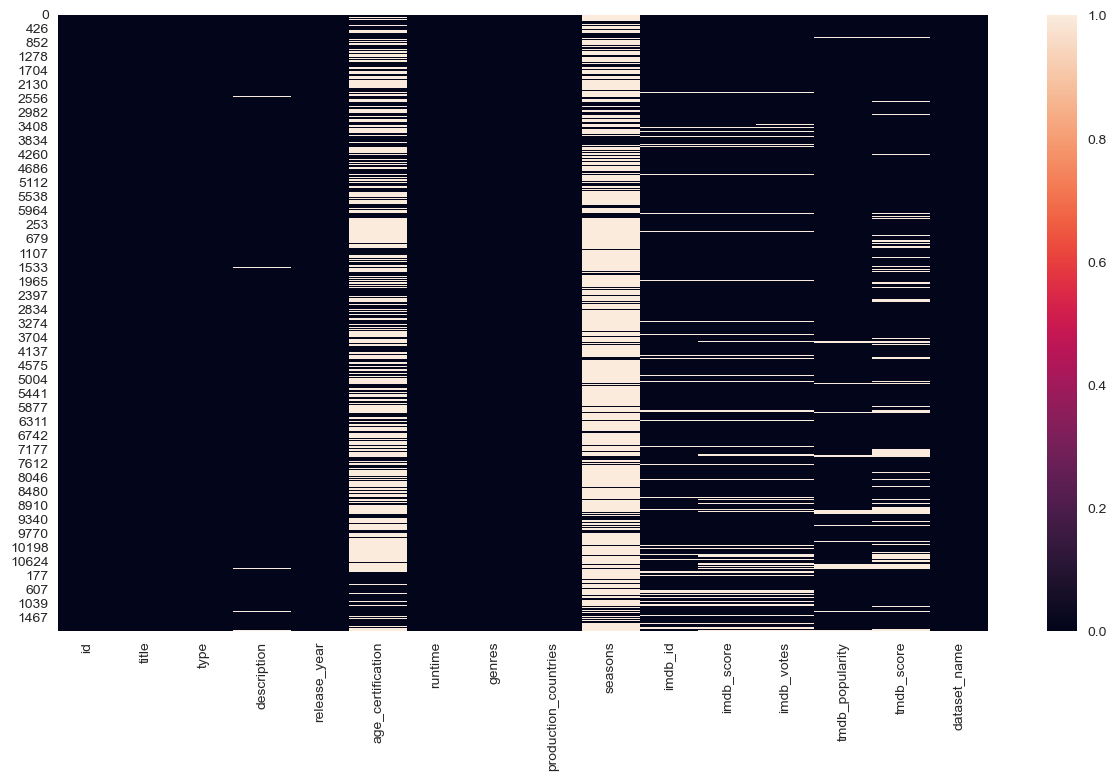

In [12]:
plt.figure(figsize=(15, 8))
sns.heatmap(df_movies.isnull())

In [13]:
# percentile of missing values
round(100*(df_movies.isnull().sum()/len(df_movies.index)),2).sort_values(ascending = False)

seasons                 76.86
age_certification       55.22
tmdb_score              13.47
imdb_votes              11.34
imdb_score              11.13
imdb_id                  8.40
tmdb_popularity          3.53
description              0.94
id                       0.00
title                    0.00
type                     0.00
release_year             0.00
runtime                  0.00
genres                   0.00
production_countries     0.00
dataset_name             0.00
dtype: float64

In [14]:
null_counts = df_movies.groupby('type')['seasons'].apply(lambda x: x.isnull().sum())
null_counts

type
MOVIE    14376
SHOW         0
Name: seasons, dtype: int64

This shows that all movies have seasons column as null, since its of type float64 adding 0 for all missing value

In [15]:
df_movies['seasons'] = df_movies['seasons'].fillna(0)

In [16]:
#age_certification   
df_movies['age_certification'].unique()  

array(['TV-MA', 'PG', 'R', 'TV-14', nan, 'TV-PG', 'PG-13', 'TV-Y',
       'TV-Y7', 'TV-G', 'G', 'NC-17', 'TV-Y7-FV'], dtype=object)

In [17]:
df_movies['age_certification'] = df_movies['age_certification'].fillna('NA')

In [18]:
# Calculate the mean value of tmdb_score for movies and series
movie_mean_ts = df_movies.loc[df_movies['type'] == 'MOVIE', 'tmdb_score'].mean().round(2)
series_mean_ts = df_movies.loc[df_movies['type'] == 'SHOW', 'tmdb_score'].mean().round(2)

# Calculate the mean value of imdb_votes for movies and series
movie_mean_iv = df_movies.loc[df_movies['type'] == 'MOVIE', 'imdb_votes'].mean().round(2)
series_mean_iv = df_movies.loc[df_movies['type'] == 'SHOW', 'imdb_votes'].mean().round(2)

# Calculate the mean value of imdb_score for movies and series
movie_mean_is = df_movies.loc[df_movies['type'] == 'MOVIE', 'imdb_score'].mean().round(2)
series_mean_is = df_movies.loc[df_movies['type'] == 'SHOW', 'imdb_score'].mean().round(2)



In [19]:
df_movies.loc[df_movies['type'] == 'MOVIE', 'tmdb_score'] = df_movies.loc[df_movies['type'] == 'MOVIE', 'tmdb_score'].fillna(movie_mean_ts)
df_movies.loc[df_movies['type'] == 'SHOW', 'tmdb_score'] = df_movies.loc[df_movies['type'] == 'SHOW', 'tmdb_score'].fillna(series_mean_ts)


df_movies.loc[df_movies['type'] == 'MOVIE', 'imdb_votes'] = df_movies.loc[df_movies['type'] == 'MOVIE', 'imdb_votes'].fillna(movie_mean_iv)
df_movies.loc[df_movies['type'] == 'SHOW', 'imdb_votes'] = df_movies.loc[df_movies['type'] == 'SHOW', 'imdb_votes'].fillna(series_mean_iv)


df_movies.loc[df_movies['type'] == 'MOVIE', 'imdb_score'] = df_movies.loc[df_movies['type'] == 'MOVIE', 'imdb_score'].fillna(movie_mean_is)
df_movies.loc[df_movies['type'] == 'SHOW', 'imdb_score'] = df_movies.loc[df_movies['type'] == 'SHOW', 'imdb_score'].fillna(series_mean_is)

In [20]:
#imdb_id 
df_movies['imdb_id'] = df_movies['imdb_id'].fillna('NA')

#description
df_movies['description'] = df_movies['description'].fillna('NA')

In [21]:
tmdb_subset = df_movies[df_movies['tmdb_popularity'].isnull()]

In [22]:
median_popularity = round(df_movies['tmdb_popularity'].median(), 2)

In [23]:
df_movies['tmdb_popularity'] = df_movies['tmdb_popularity'].fillna(median_popularity)

In [24]:
df_movies.type.value_counts()

MOVIE    14376
SHOW      4328
Name: type, dtype: int64

In [25]:
# percentile of missing values
round(100*(df_movies.isnull().sum()/len(df_movies.index)),2).sort_values(ascending = False)

id                      0.0
title                   0.0
type                    0.0
description             0.0
release_year            0.0
age_certification       0.0
runtime                 0.0
genres                  0.0
production_countries    0.0
seasons                 0.0
imdb_id                 0.0
imdb_score              0.0
imdb_votes              0.0
tmdb_popularity         0.0
tmdb_score              0.0
dataset_name            0.0
dtype: float64

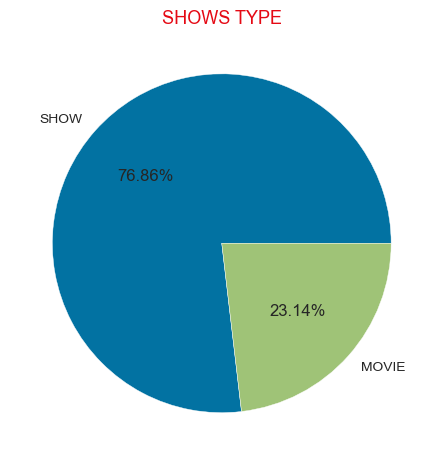

In [26]:
plt.pie(df_movies.groupby(['type'])['type'].count(), labels=df_movies['type'].unique(), autopct='%1.2f%%')
plt.title("SHOWS TYPE", color="#E50914",fontsize=13)
plt.show()

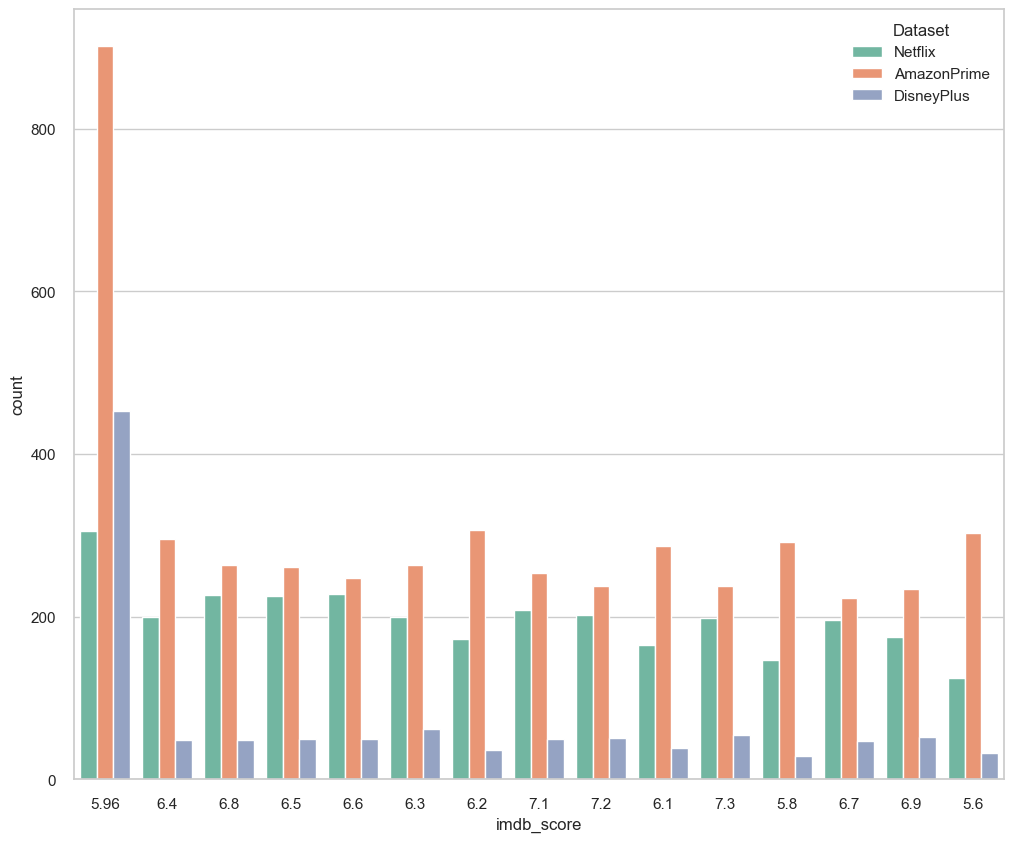

In [27]:
plt.figure(figsize=(12,10))
sns.set(style="whitegrid")
ax = sns.countplot(x="imdb_score", data=df_movies,hue="dataset_name", palette="Set2", order=df_movies['imdb_score'].value_counts().index[0:15])
ax.legend(title="Dataset")
plt.show()

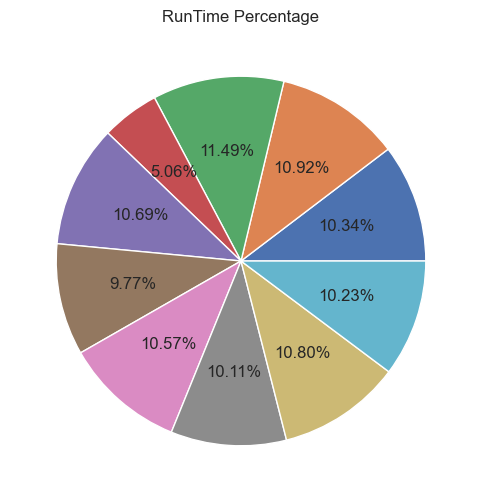

In [28]:
plt.figure(figsize=(10, 6))
plt.pie(list(df_movies['runtime'].value_counts()[0:10].keys()),autopct='%0.2f%%')
plt.title("RunTime Percentage")
plt.show()

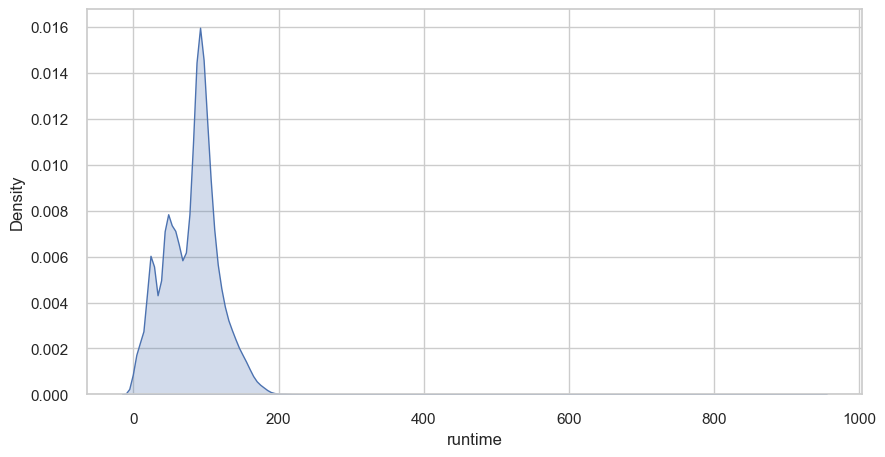

In [29]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=df_movies['runtime'], shade=True)
sns.set(style='darkgrid')

<Axes: xlabel='count', ylabel='release_year'>

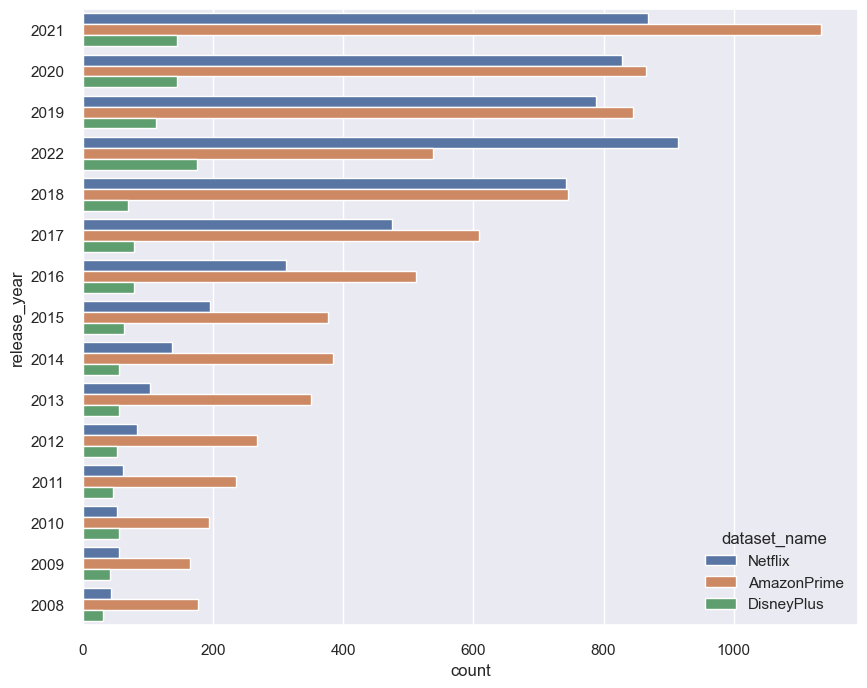

In [30]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df_movies, y="release_year",hue="dataset_name", order=df_movies['release_year'].value_counts().index[0:15])

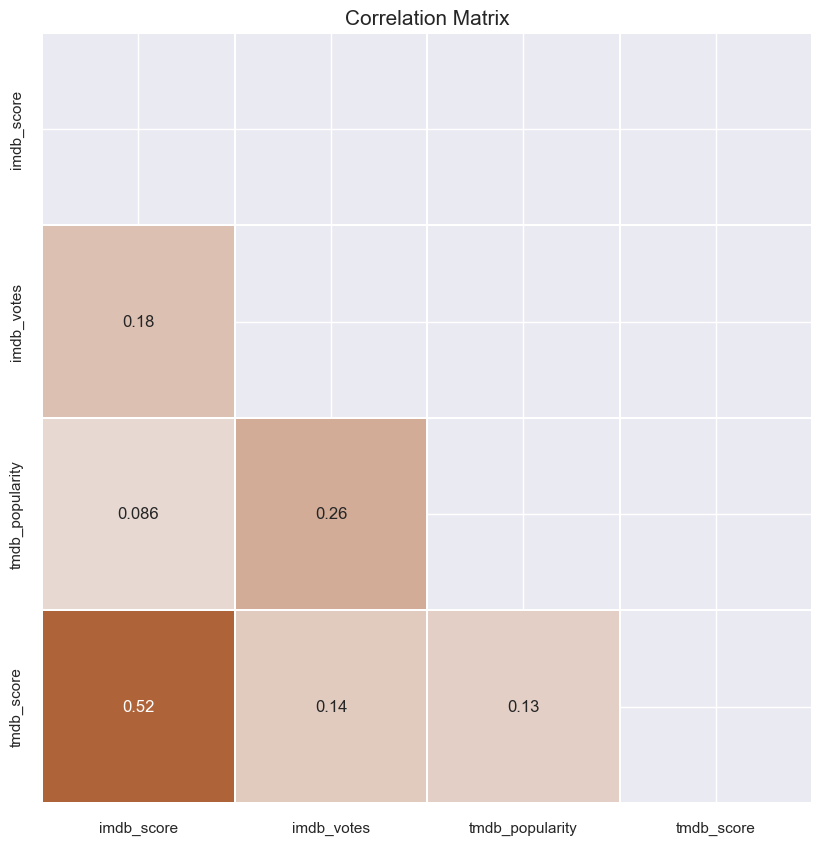

In [31]:
features = ['imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score'
]
correlation_matrix = df_movies[features].corr()

f, ax = plt.subplots(figsize=(12, 10))
show = sns.heatmap(correlation_matrix, mask=np.triu(np.ones_like(correlation_matrix, dtype=bool)), cmap=sns.diverging_palette(130, 30, as_cmap=True), 
    center=0, square=True, linewidths=.1, cbar=False, ax=ax, annot=True,
)
show = ax.set_title("Correlation Matrix", fontsize=15)

<Axes: title={'center': 'Top Production Countries'}, xlabel='production_countries', ylabel='count'>

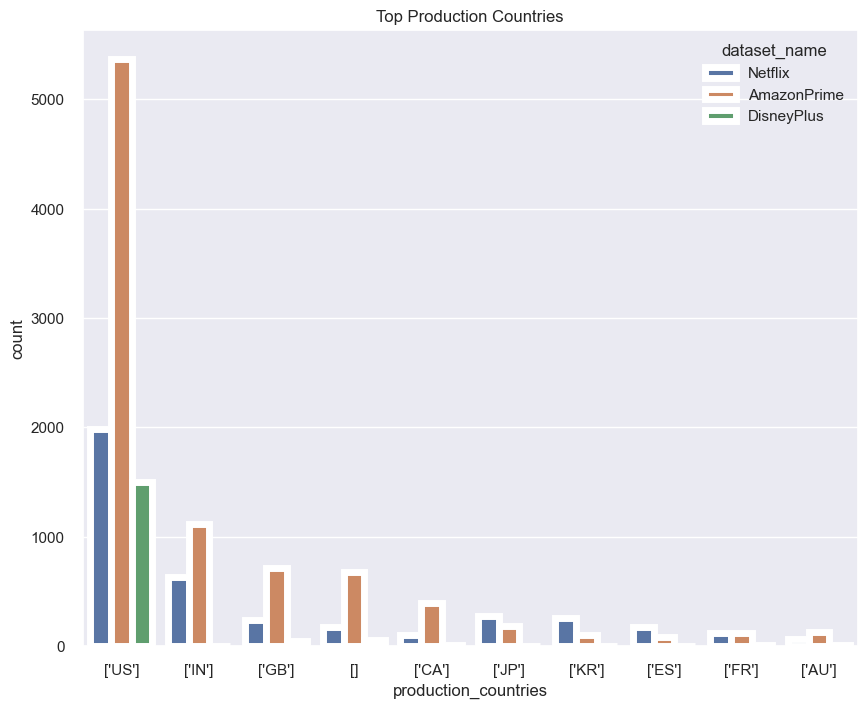

In [32]:
plt.figure(figsize = (10,8))
plt.title('Top Production Countries')
sns.countplot(x='production_countries', data = df_movies,hue='dataset_name',order = df_movies['production_countries'].value_counts().index[:10] ,linewidth =5)

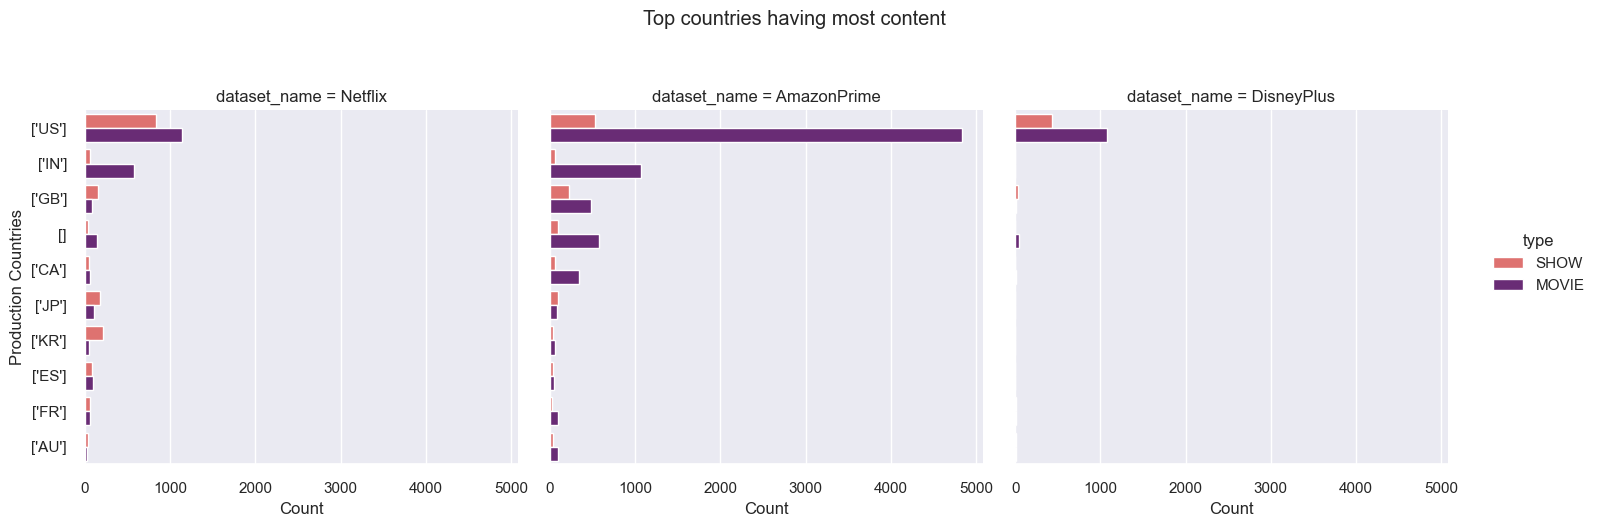

In [33]:
# create the subplots divided by dataset name
fig = sns.catplot(kind='count', data=df_movies, y='production_countries', order=df_movies['production_countries'].value_counts().index[0:10], hue='type', col='dataset_name', palette='magma_r')

# set title and axis labels
fig.fig.suptitle('Top countries having most content', y=1.05)
fig.set_axis_labels(y_var='Production Countries', x_var='Count')

# adjust plot layout
fig.tight_layout()

# show the plot
plt.show()

In [34]:
df_movies['genres'] = df_movies['genres'].str.replace(r"[", '').str.replace(r"'", '').str.replace(r"]", '')
df_movies['main_genre'] = df_movies['genres'].str.split(',').str[0]

In [35]:
df_movies['main_genre'].unique()

array(['documentation', 'drama', 'romance', 'crime', 'fantasy', 'comedy',
       'thriller', 'action', 'animation', 'family', 'reality', 'scifi',
       'western', 'horror', '', 'war', 'music', 'history', 'sport',
       'european'], dtype=object)

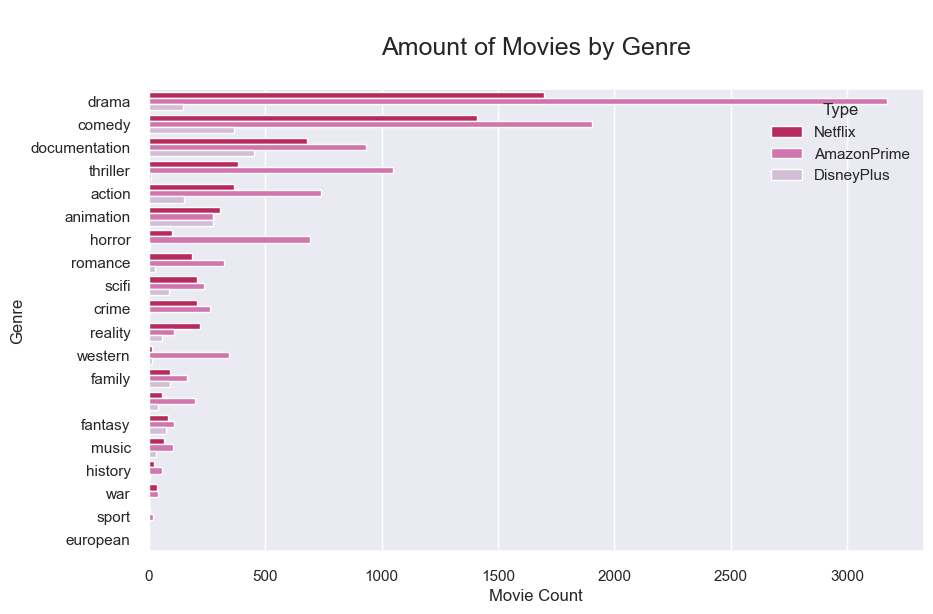

In [36]:
bp_df = pd.DataFrame(df_movies.main_genre.value_counts())
order = bp_df.index
plt.figure(figsize=(10,6))
plt.title('\nAmount of Movies by Genre\n', fontsize=18)
sns.countplot(y=df_movies.main_genre, palette='PuRd_r', order=order, hue=df_movies.dataset_name)
plt.xlabel('Movie Count')
plt.ylabel('Genre')
plt.legend(title='Type', loc='upper right')
plt.show()

In [37]:
df_movies.loc[df_movies['type'] == 'MOVIE', ['seasons']] = 0

### PYCaret

In [38]:
df_pycaret = df_movies.dropna(subset=['imdb_score'])

In [39]:
# Setting up the classification model using PyCarets
clf = setup(data = df_movies, target = 'main_genre', session_id=42)

# Comparing different classification models
compare_models()

# Creating a model using a selected algorithm
lr = create_model('lr')

# Tuning the model hyperparameters
tuned_lr = tune_model(lr)

# Evaluating the model performance
evaluate_model(tuned_lr)

# Finalizing and saving the model
final_lr = finalize_model(tuned_lr)
save_model(final_lr, 'lr_model')

ValueError: Length mismatch: Expected axis has 154667 elements, new values have 6754347 elements

In [ ]:
from pycaret.classification import ClassificationExperiment
s = ClassificationExperiment()
s.setup(data = df_movies, target = 'main_genre', session_id=42)


Recomendation Engine


In [ ]:
new_df = df_movies[['title','type','genres','release_year','imdb_score','imdb_votes']]

In [ ]:
new_df = new_df[new_df['imdb_votes']>500]

In [ ]:
new_df = new_df.sort_values(by = ['imdb_votes','imdb_score'], ascending = False)

In [ ]:
popular_movies = new_df[new_df['type'] == 'MOVIE'].head(50)

In [ ]:
popular_shows = new_df[new_df['type'] == 'SHOW'].head(50)

In [ ]:
popular_movies

In [ ]:
popular_shows